# Ejemplo aplicación de PLSPM
___
**Autores:** Wilmar Sepulveda - Luis Esteban Garcia

**Institución:** Escuela de estadística - Universidad del Valle
___




## Software, librerías y datos
Se utiliza el software R y la librería *plspm* 

In [91]:
#install.packages('devtools')
library(devtools)
#install_github("gastonstat/plspm") ## Instalamos plspm del github de Gaston Sanchez
library(plspm)

Para mostrar un ejemplo de análisis de con *plspm()*, utilizaremos el conjunto de datos **russett**
que es uno de los ejemplos tradicionales para presentar PLS-PM. 

Los datos contienen 11 variables sobre la desigualdad agrícola, el desarrollo industrial y la
inestabilidad política medidos en 47 países

                               Tabla 1: Descripción de variables en el dataset

| Variable  | Descripción                                                 | Bloque | Tipo       |
|-----------|-------------------------------------------------------------|--------|------------|
| gini      | Desigualdad en la distribución de la tierra                 | AGRIN  | Continua   |
| farm      | Porcentaje de agricultores que poseen la mitad de la tierra | AGRIN  | Continua   |
| rent      | Porcentaje de agricultores que alquilan toda su tierra      | AGRIN  | Continua   |
| gnpr      | Producto nacional bruto per cápita                          | INDEV  | Continua   |
| labo      | Porcentaje de la mano de obra empleada en la agricultura    | INDEV  | Continua   |
| inst      | Inestabilidad del ejecutivo                                 | POLINS | Continua   |
| ecks      | Número de incidentes violentos de guerra interna            | POLINS | Continua   |
| death     | Número muertos como resultado de la violencia               | POLINS | Continua   |
| demostab  | Régimen político: democracia estable                        | POLINS | Dicotómica |
| demoinst  | Régimen político: democracia inestable                      | POLINS | Dicotómica |
| dictator  | Régimen político: dictadura                                 | POLINS | Dicotómica |


El conjunto de datos russet luce de la siguiente manera

In [92]:
data(russett)
print( dim(russett))
head(russett)

[1] 47 11


,gini,farm,rent,gnpr,labo,inst,ecks,death,demostab,demoinst,dictator
Argentina,86.3,98.2,3.52,5.92,3.22,0.07,4.06,5.38,0,1,0
Australia,92.9,99.6,3.40,7.10,2.64,0.01,0.00,0.00,1,0,0
Austria,74.0,97.4,2.46,6.28,3.47,0.03,1.61,0.00,0,1,0
Belgium,58.7,85.8,4.15,6.92,2.30,0.45,2.20,0.69,1,0,0
Bolivia,93.8,97.7,3.04,4.19,4.28,0.37,3.99,6.50,0,0,1
Brasil,83.7,98.5,2.31,5.57,4.11,0.45,3.91,0.69,0,1,0


El modelo estructural propuesto consta de tres variables latentes: La desigualdad agrícola (AGRIN), el desarrollo industrial (INDEV) y la inestabilidad política (POLINS). 

La hopótesis para explicar la relación entre las variables latentes es la siguiente: ***La Inestabilidad Política de un país depende tanto de su Desigualdad Agrícola y de su Desarrollo Industrial***, de forma matemática se puede expresar el modelo como.

$$POLINS = \beta_1AGRIN + \beta_2 INDEV$$

Además de los datos, los otros ingredientes principales que necesitamos para realizar un análisis PLS-PM son: un modelo interno (es decir, un modelo estructural) y un modelo externo (es decir, un modelo de medición), la siguiente figura resume el modelo propuesto.
<img src="multi.jpg">

### Definición del modelo interno (estructural)

Lo primero que hay que hacer es definir el modelo interno en formato de matriz. Más específicamente, esto implica que se necesita necesita proporcionar las relaciones estructurales en lo que llamamos una matriz de trayectorias

In [93]:
# matriz de trayectorias (relaciones en el modelo interno)
AGRIN = c(0, 0, 0)
INDEV = c(0, 0, 0)
POLINS = c(1, 1, 0)
rus_path = rbind(AGRIN, INDEV, POLINS)
colnames(rus_path) = rownames(rus_path)
rus_path

,AGRIN,INDEV,POLINS
AGRIN,0,0,0
INDEV,0,0,0
POLINS,1,1,0


La matriz de ruta debe ser triangular superior, debe leerse como "columnas que afectan a las filas". un número 1 en la celda $i,j$ indica que la columna $j$ afecta a la fila $i$, por ejemplo, el uno en la celda (3,1) indica que AGRIN afecta a POLINS, los ceros en la diagonal, indican que una variable latente no se afecta a sí misma y los ceros por encima de la diagonal implican que PLS-PM sólo funciona con modelos no recursivos (sin bucles en el modelo interno).

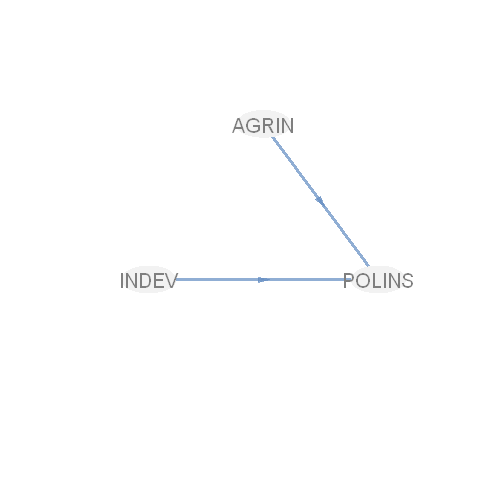

In [94]:
options(repr.plot.width=4, repr.plot.height=4) ## personaliza el tamaño de los gráficos
innerplot(rus_path)  ## visualiza la matriz de trayectorias

### Definición del modelo externo (de medida)

Para denotar el modelo externo, se crea un objeto tipo lista, cuyo objetivo es, básicamente indicar a la función *plspm()* qué variables del conjunto de datos están asociadas a cada una de las variables latentes.

In [95]:
# Lista que indica qué variables estan asociadas con cada variable latente
rus_blocks = list(
  c("gini", "farm", "rent"),
  c("gnpr", "labo"),
  c("inst", "ecks", "death", "demostab", "demoinst", "dictator")
)

rus_blocks

[[1]]
[1] "gini" "farm" "rent"

[[2]]
[1] "gnpr" "labo"

[[3]]
[1] "inst"     "ecks"     "death"    "demostab" "demoinst" "dictator"

Por defecto, plspm() establecerá la medición de las variables latentes en modo refectivo, conocido como modo $A$ en el mundo del PLSPM. Sin embargo, es una buena idea si proporciona explícitamente el vector de modos de medición utilizando un vector de caractéres con tantas letras $A$ como variables latentes.

In [96]:
# Todas las variables latentes se miden en modo reflectivo
rus_modes = rep("A", 3)
rus_modes

[1] "A" "A" "A"

## Iterando el PLS-PM
Habiendo definido el modelo interno, el modelo externo y los modos de medición, se puede correr la función *plspm()* que tendrá en cuenta dichas definiciones, la interpretación de los resultados se realiza en dos etapas: la evaluación del modelo de medida (o externo) y la evaluación del modelo estructural (o interno), en ese orden:

In [97]:
# run plspm analysis
rus_pls = plspm(russett, rus_path, rus_blocks, modes = rus_modes)

rus_pls

Partial Least Squares Path Modeling (PLS-PM) 
---------------------------------------------
   NAME             DESCRIPTION
1  $outer_model     outer model
2  $inner_model     inner model
3  $path_coefs      path coefficients matrix
4  $scores          latent variable scores
5  $crossloadings   cross-loadings
6  $inner_summary   summary inner model
7  $effects         total effects
8  $unidim          unidimensionality
9  $gof             goodness-of-fit
10 $boot            bootstrap results
11 $data            data matrix
---------------------------------------------
You can also use the function 'summary' 


El objeto *rus_pls* contiene todos los resultados derivados del PLSPM, por ejempli si se quiere examinar la matriz de coeficientes de trayectoria

### valoración del modelo de medida

1) unidimensionalidad de las variables manifiestas:
En PLS-PM tenemos 3 indices que nos permiten evaluar la unidimensionalidad: *El alpha de Cronbach*, el *rho de Dillon-Goldstein* y el primer valor propio de la matriz de  correlaciones de las variables manifiestas

In [98]:
# imprimimos los indices de unidimensionalidad
rus_pls$unidim


,Mode,MVs,C.alpha,DG.rho,eig.1st,eig.2nd
AGRIN,A,3,0.8232005,8.982412e-01,2.251986,0.6887036
INDEV,A,2,0.0000000,2.666533e-31,1.815101,0.1848986
POLINS,A,6,0.0000000,5.473573e-01,2.722370,1.6890693


Recordemos que para que un bloque se considere unidimensional u homogeneo, debe tener un alpha de Cronbach mayor que 0.7, un rho de Dillon-Goldstein mayor que 0.7 o un primer valor propio mayor que 1. En este caso, podemos decir que INDEV y POLINS no son unidimensionales

In [99]:
subset(rus_pls$outer_model,block %in% c("INDEV","POLINS"))

,name,block,weight,loading,communality,redundancy
4,gnpr,INDEV,-0.51122014,0.95010526,0.902700010,0.00000000
5,labo,INDEV,0.53844233,-0.95513860,0.912289754,0.00000000
6,inst,POLINS,0.10398720,0.35159296,0.123617607,0.07693877
7,ecks,POLINS,0.27000262,0.81570461,0.665374005,0.41412435
8,death,POLINS,0.30231060,0.79388313,0.630250430,0.39226367
9,demostab,POLINS,-0.33629927,-0.86570450,0.749444276,0.46644912
10,demoinst,POLINS,0.03686531,0.09430616,0.008893652,0.00553535
11,dictator,POLINS,0.28455385,0.73302381,0.537323908,0.33442682


Observe que las cargas y los pesos del bloque INDEV tienen signos contrarios, y la variable demostab también tiene signo negativo, por tanto, cambiamos el signo de ellas y volvemos a correr el modelo

In [100]:
## Cambiendo signos de variables
russett$labo=-1*russett$labo 
russett$demostab=-1*russett$demostab
rus_pls_new = plspm(russett, rus_path, rus_blocks, modes = rus_modes)
rus_pls_new$unidim

,Mode,MVs,C.alpha,DG.rho,eig.1st,eig.2nd
AGRIN,A,3,0.8232005,0.8982412,2.251986,0.6887036
INDEV,A,2,0.8981332,0.9515351,1.815101,0.1848986
POLINS,A,6,0.7117010,0.8087673,2.722370,1.6890693


Ahora todas las cargas y pesos tienen signo positivo

**2) Comprobar que las variables manifiestas están bien explicadas por su variable latente**

In [119]:
rus_pls_new$outer_model

name,block,weight,loading,communality,redundancy
gini,AGRIN,0.45956889,0.97700902,0.95454662,0.000000000
farm,AGRIN,0.51627850,0.98596926,0.97213538,0.000000000
rent,AGRIN,0.08133392,0.51592641,0.26618006,0.000000000
gnpr,INDEV,0.51122100,0.95010543,0.90270032,0.000000000
labo,INDEV,0.53844147,0.95513845,0.91228946,0.000000000
inst,POLINS,0.10397873,0.35161192,0.12363094,0.076947345
ecks,POLINS,0.26999565,0.81570557,0.66537559,0.414126796
death,POLINS,0.30227163,0.79385407,0.63020429,0.392236338
demostab,POLINS,0.33634320,0.86574040,0.74950644,0.466489466
demoinst,POLINS,0.03691744,0.09437696,0.00890701,0.005543684


Recordemos que una carga que es la correlacion entre la variable latente y sus variables manifiestas, y la comunalidad es el cuadrado de esta correlación, valores de cargas de 0.7 son aceptables y si una variable tiene comunalidad baja suele ser eliminada, en este caso, las variables 'rent' y'inst' y 'demoinst' tienen comunalidades bajas, sin embargo, para este ejercicio no las eliminaremos del análisis.

**3) evaluar el grado en que una variable latente es diferente a otras**

Para ello, tenemos que evaluar las cargas cruzadas

In [120]:
rus_pls_new$crossloadings

name,block,AGRIN,INDEV,POLINS
gini,AGRIN,0.9770090,-0.291531488,0.40955412
farm,AGRIN,0.9859693,-0.353496066,0.46009776
rent,AGRIN,0.5159264,0.059843016,0.07242290
gnpr,INDEV,-0.3372762,0.950105425,-0.70663066
labo,INDEV,-0.2585078,0.955138450,-0.74426537
inst,POLINS,0.1298116,-0.205152126,0.35161192
ecks,POLINS,0.3236969,-0.546069330,0.81570557
death,POLINS,0.4324022,-0.541369067,0.79385407
demostab,POLINS,0.3750163,-0.708430177,0.86574040
demoinst,POLINS,0.1247100,0.005836657,0.09437696


la variable demoinst parece presentar problemas.

## Valoración del modelo estructural 

Una vez evaluada la calidad del modelo de medida, pasamos a evaluar la calidad del
modelo estructural estudiando los resultados obtenidos en cada regresión de las ecuaciones
estructurales. Esto lo hacemos mirando

In [121]:
## visualizamos los coeficientes estimados del modelo
rus_pls_new$inner_model

,Estimate,Std. Error,t value,Pr(>|t|)
Intercept,-3.380942e-16,0.09263865,-3.649602e-15,1.000000e+00
AGRIN,2.150870e-01,0.09749294,2.206180e+00,3.263803e-02
INDEV,-6.949637e-01,0.09749294,-7.128349e+00,7.416252e-09


Se puede observar que tanto AGRIN cómo INDEV son estadísticamente significativas para explicar la variable latente POLINS.

In [122]:
rus_pls_new$inner_summary

,Type,R2,Block_Communality,Mean_Redundancy,AVE
AGRIN,Exogenous,0.0000000,0.7309540,0.0000000,0.7309540
INDEV,Exogenous,0.0000000,0.9074949,0.0000000,0.9074949
POLINS,Endogenous,0.6223955,0.4524844,0.2816243,0.4524844


Recordemos que un $R^2$ por encima de 0.6 se considera aceptable, la tabla muestra la comunalidad media y la redundancia media

## Valoración del modelo completo

Para ello calculamos el indice GOF, el cuál es una media geometrica entre el indice medio de comunalidad y el $R^2$, recordemos que valores por encima de 0.6 se consideran aceptables

In [123]:
rus_pls_new$gof

[1] 0.6167521

Para un análisis completo de todos los resultados del modelo se puede aplicar la función **summary()**

In [124]:
summary(rus_pls_new)

PARTIAL LEAST SQUARES PATH MODELING (PLS-PM) 

---------------------------------------------------------- 
MODEL SPECIFICATION 
1   Number of Cases      47 
2   Latent Variables     3 
3   Manifest Variables   11 
4   Scale of Data        Standardized Data 
5   Non-Metric PLS       FALSE 
6   Weighting Scheme     centroid 
7   Tolerance Crit       1e-06 
8   Max Num Iters        100 
9   Convergence Iters    6 
10  Bootstrapping        FALSE 
11  Bootstrap samples    NULL 

---------------------------------------------------------- 
BLOCKS DEFINITION 
     Block         Type   Size   Mode
1    AGRIN    Exogenous      3      A
2    INDEV    Exogenous      2      A
3   POLINS   Endogenous      6      A

---------------------------------------------------------- 
BLOCKS UNIDIMENSIONALITY 
        Mode  MVs  C.alpha  DG.rho  eig.1st  eig.2nd
AGRIN      A    3    0.823   0.898     2.25    0.689
INDEV      A    2    0.898   0.952     1.82    0.185
POLINS     A    6    0.712   0.809     2.72 

## Análisis gráfico de los resultados
Vamos a visualizar los resultados del plspm y las diferentes relaciones

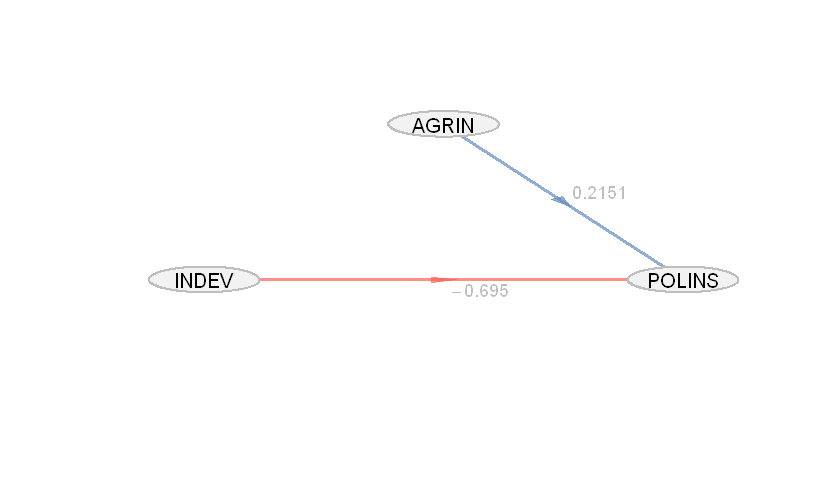

In [125]:
# plot resultados (modelo interno)
plot(rus_pls_new,txt.col = "black",lcol = "gray")

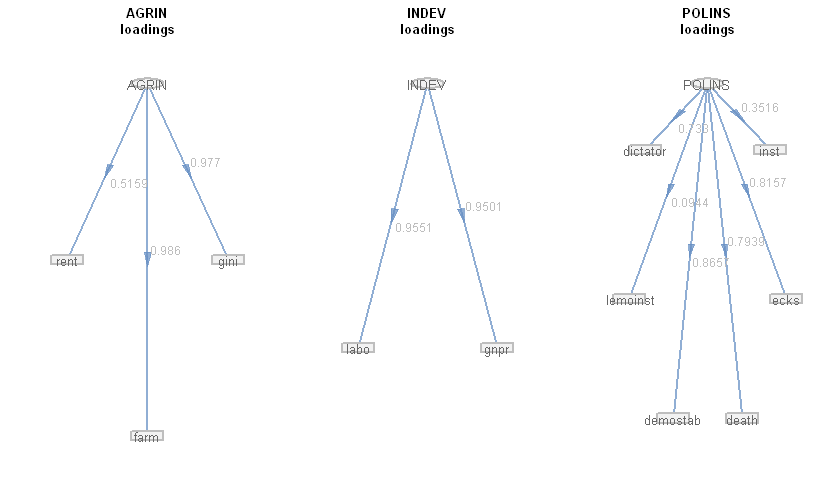

In [127]:
# trazar las cargas del modelo externo
options(repr.plot.width=7, repr.plot.height=4)
plot(rus_pls_new, what = "loadings", arr.width = 0.1,lcol = "gray")

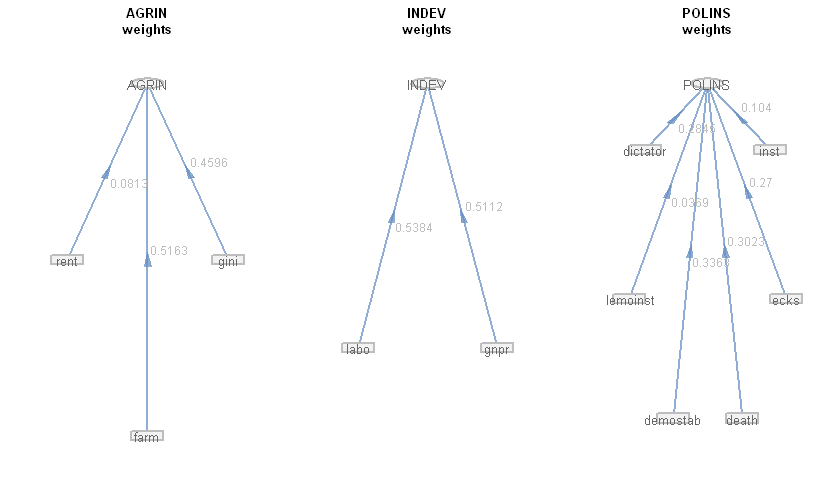

In [128]:
# trazar los pesos del modelo externo
options(repr.plot.width=7, repr.plot.height=4)
plot(rus_pls_new, what = "weights", arr.width = 0.1,,lcol = "gray")

Ahora vamos a visualizar las cargas cruzadas, combinando las funciones de reshape y ggplot2 para realizar una bonita y útil visualización

In [129]:
## cargamos paquetes necesarios
library(ggplot2)
#install.packages('reshape')
library(reshape)

In [138]:
## Reconfiguramos las cargas cruzadas para el gráfico
xloads = melt(rus_pls_new$crossloadings, id.vars = c("name", "block"),
              variable_name = "LV")
head(xloads)

name,block,LV,value
gini,AGRIN,AGRIN,0.9770090
farm,AGRIN,AGRIN,0.9859693
rent,AGRIN,AGRIN,0.5159264
gnpr,INDEV,AGRIN,-0.3372762
labo,INDEV,AGRIN,-0.2585078
inst,POLINS,AGRIN,0.1298116


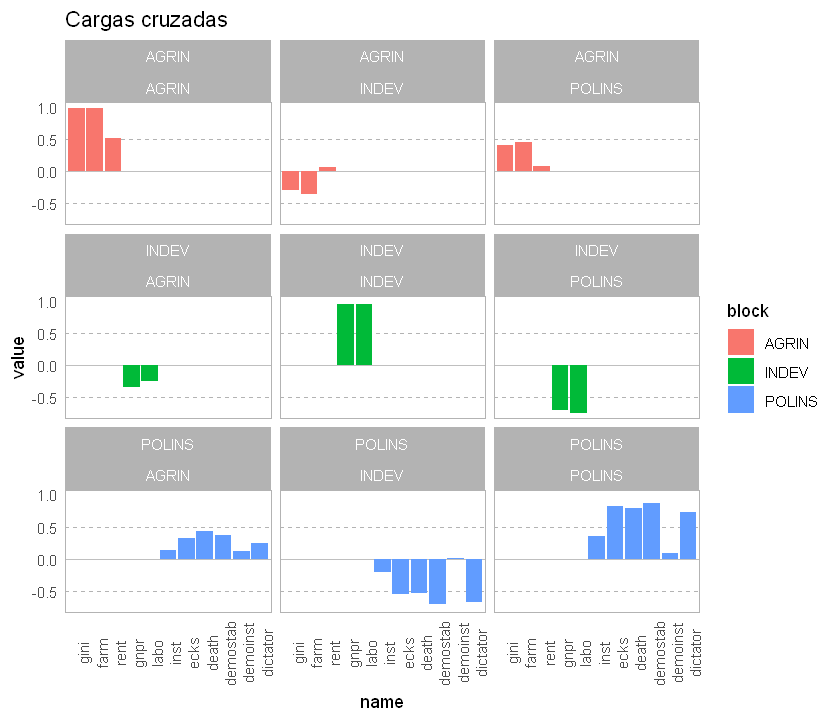

In [139]:
# bar-charts of crossloadings by block
options(repr.plot.width=7, repr.plot.height=6)
ggplot(data = xloads,
      aes(x = name, y = value, fill = block)) +
  geom_hline(yintercept = 0, color = "gray75") +
  geom_hline(yintercept = c(-0.5, 0.5), color = "gray70", linetype = 2) +
  geom_bar(stat = 'identity', position = 'dodge') +
  facet_wrap(block ~ LV) +
  ggtitle("Cargas cruzadas")+
  theme_light()+
  theme(axis.text.x = element_text(angle = 90),
    line = element_blank())